<h1 style = "text-align:center"> Cloud Computing and Big Data, Spring 2022</h1>
<h2 style = "text-align:center"> Assignment Report</h2>

<br>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold"> Set Date: Friday, June 10, 2022</div>
<div style="font-weight:bold"> Due Date: 11:59pm, Friday, July 01, 2022</div>
<br>
This assignment counts for 30% of the final grade, along with 40% lab practical, and 30% final exam
<br>
Submit your completed Jupyter notebook file through the course website in the Blackboard Learn system
</div>


---

## Assignment Title: Word Prediction Using Logistic Regression

## Student Name: Runyi Wang
## Student ID: 320190940491

---

# Assignment Requirements

This assignment examines the level of knowledge the students have learned from the course. The assignment must be done on a cloud computing platform, for example, the Apache Spark platform.

#### Abstract
---
*(Briefly summarize the cloud-based assignment including the problem, data sets, models, evaluation, and final findings.)* 

本项目将采用机器学习中的逻辑回归模型实现对于句子的单字预测，查看所需要预测的句子中是否包含“S􏰂􏰏􏰐􏰘park”这个单字。项目数据集较小， 利用 ML􏰅􏰍􏰄 中的 􏰉􏰏􏰁􏰏􏰗􏰐􏰏􏰓􏰋 创建相关函数，采用手动输入方式进行原始数据集输入，使用 准确率(A􏰈􏰈􏰒􏰐􏰏􏰈􏰕)作为算法评价指标，来判断输出结果的可靠性。

### 1. Introduction
---
*(Introduce the assignment, describe the objectives, and present the results. This section will provide an overview of the entire assignment including the description of the data sets and the cloud-based data analytics methods and techniques the team used for analyzing the data to address the problem. Highlight the key findings.)* 

本项目将采用机器学习中的逻辑回归模型实现对于句子的单字预测，查看所需要预测的句子中是否包含“Spark􏰂􏰏􏰐􏰘”这个单字。项目数据集较小， 利用 ML􏰅􏰍􏰄 中的 􏰉􏰏􏰁􏰏􏰗􏰐􏰏􏰓􏰋 创建相关函数，采用手动输入方式进行原始数据集输入，使用 准确率(A􏰈􏰈􏰒􏰐􏰏􏰈􏰕)作为算法评价指标，来判断输出结果的可靠性。

### 2. Problem Definition
---
*(Define the problem that will be solved in this cloud computing assignment, what are the challenges of this problem?)*

问题定义：MLlib 下逻辑回归模型(LR) 实现句子的单字预测


### 3. Data
---
*(Describe the origin, format, and  charateristics of the data. For example, where the data was obtained from, what data is contained in the set. The size of the dataset in terms of instances and features. What are the classes of the dataset)*

Data Description: A small dataset that contains 


In [1]:
# Import Relevant Modules and Libraries

# Modules for DataFrame Structure
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
# Modelues for pySpark Machine Learning Tool (Mlib)
from pyspark.ml.feature import Tokenizer,HashingTF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator,BinaryClassificationEvaluator
from pyspark.ml import Pipeline,PipelineModel
from pyspark.ml.linalg import Vector
from pyspark.sql import Row

# Modeules for Distuibuted Computing
import pyspark 
import findspark
from pyspark.sql import SparkSession
from pyspark.storagelevel import StorageLevel 

spark = SparkSession.builder \
        .appName("dbscan") \
        .config("master","local[4]") \
        .enableHiveSupport() \
        .getOrCreate()

sc = spark.sparkContext

/home/hadoop/my_project_dir/my_project_env/lib/python3.6/site-packages/pyspark/context.py:238: FutureWarning: Python 3.6 support is deprecated in Spark 3.2.
  FutureWarning


In [2]:
data_train_raw = [(0,"a b c d e spark",1.0),
                  (1,"a c f g",0.0),
                  (2,"learn spark and say hello world",1.0),
                  (3,"hadoop mapreduce big data analysis",0.0),
                  (4,"I love spark and spark is fast", 1.0),
                  (5,"big data needs ",0.0),
                  (6,"spark is much faster than mapreduce",1.0),
                  (7,"spark is based on hadoop",1.0),
                  (8,"spark fast ",1.0),
                  (9,"fast does not mean reliable",0.0),
                  (10,"hello spark and hadoop",0.0)]

data_test_raw = [(11,"spark job",1.0),
                 (12,"hello world and hadoop",0.0),
                 (13,"a b c d e",0.0),
                 (14,"fast blast cast mapreduce",0.0),
                 (15,"spark is easy to use.",1.0)]

df_train = pd.DataFrame(data_train_raw, columns=["id","text","label"])
df_test = pd.DataFrame(data_test_raw, columns=["id","text","label"])

In [3]:
# Check df_train
df_train

,id,text,label
0,0,a b c d e spark,1.0
1,1,a c f g,0.0
2,2,learn spark and say hello world,1.0
3,3,hadoop mapreduce big data analysis,0.0
4,4,I love spark and spark is fast,1.0
5,5,big data needs,0.0
6,6,spark is much faster than mapreduce,1.0
7,7,spark is based on hadoop,1.0
8,8,spark fast,1.0
9,9,fast does not mean reliable,0.0


In [8]:
dftrain = spark.createDataFrame([(0,"a b c d e spark",1.0),
                                 (1,"a c f g",0.0),
                                 (2,"learn spark and say hello world",1.0),
                                 (3,"hadoop mapreduce big data analysis",0.0),
                                 (4,"I love spark and spark is fast", 1.0),
                                 (5,"big data needs ",0.0),
                                 (6,"spark is much faster than mapreduce",1.0),
                                 (7,"spark is based on hadoop",1.0),
                                 (8,"spark fast ",1.0),
                                 (9,"fast does not mean reliable",0.0),
                                 (10,"hello spark and hadoop",0.0)],["id","text","label"])
dftrain.show()

+---+--------------------+-----+
| id|                text|label|
+---+--------------------+-----+
|  0|     a b c d e spark|  1.0|
|  1|             a c f g|  0.0|
|  2|learn spark and s...|  1.0|
|  3|hadoop mapreduce ...|  0.0|
|  4|I love spark and ...|  1.0|
|  5|     big data needs |  0.0|
|  6|spark is much fas...|  1.0|
|  7|spark is based on...|  1.0|
|  8|         spark fast |  1.0|
|  9|fast does not mea...|  0.0|
| 10|hello spark and h...|  0.0|
+---+--------------------+-----+



In [4]:
# Check df_test
df_test

,id,text,label
0,11,spark job,1.0
1,12,hello world and hadoop,0.0
2,13,a b c d e,0.0
3,14,fast blast cast mapreduce,0.0
4,15,spark is easy to use.,1.0


### 4. Exploratory Data Analysis
---
*(Cleanse, wrangle, transform, and analyze the data. Compute descriptive statistics and visualize the values of features and correlations between different features. Explain the process and the results.)*

In [5]:
# Print the dataset columns
df_train.columns

Index(['id', 'text', 'label'], dtype='object')

In [6]:
# Display below the first 5 rows of the DataFrame we created
df_train.head(5)

,id,text,label
0,0,a b c d e spark,1.0
1,1,a c f g,0.0
2,2,learn spark and say hello world,1.0
3,3,hadoop mapreduce big data analysis,0.0
4,4,I love spark and spark is fast,1.0


In [7]:
# Returns the row and column count of a dataset
df_train.shape

(11, 3)

In [8]:
# Returns statistics about the numerical columns in a dataset
df_train.describe()

,id,label
count,11.000000,11.000000
mean,5.000000,0.545455
std,3.316625,0.522233
min,0.000000,0.000000
25%,2.500000,0.000000
50%,5.000000,1.000000
75%,7.500000,1.000000
max,10.000000,1.000000


In [9]:
# Returns the data type of each column
df_train.dtypes

id         int64
text      object
label    float64
dtype: object

In [10]:
# Checking if there are any missing values in the dataset
df_train.isnull().sum().any()

False

<AxesSubplot:>

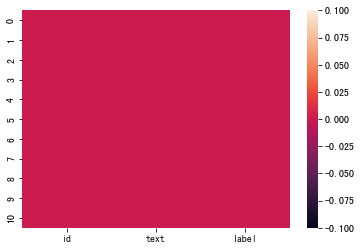

In [11]:
# Visualization to check for missing values
# I use heatmap function in "seaborn" library to identify NaN values!
sns.heatmap(df_train.isna())

In [12]:
# Counts the number of missing values in the whole dataset
df_train.isnull().sum().sum() 

0

In [13]:
# Counts null values per column
df_train.isnull().sum()

id       0
text     0
label    0
dtype: int64

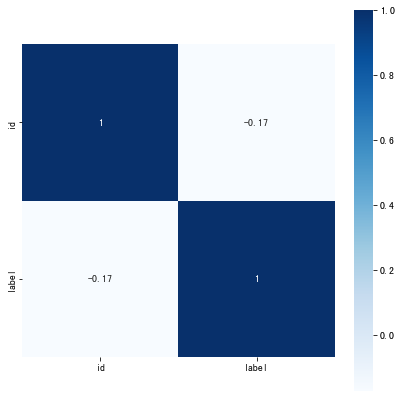

In [14]:
# Heatmap to show Correlations between different features
corr = df_train.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, cmap='Blues',square=True) 
plt.show()

### 5. Modeling and Evaluation
---
*(Build analytic models and evaluate the models on the data. Provide detail on the data analytics process you have undertaken, e.g. data cleansing and preparation, feature selection, data modelling techniques and your rationale for selecting these.The analytics should be guided by the problem defined earlier. Explain the process and results along with code snippets. For the results, application of different methods and metrics for model evaluation. Visualization of results.)*

In [9]:
# Model Construction
tokenizer = Tokenizer().setInputCol("text").setOutputCol("words")
print(type(tokenizer))

hashingTF = HashingTF().setNumFeatures(100) \
   .setInputCol(tokenizer.getOutputCol()) \
   .setOutputCol("features")
print(type(hashingTF))

lr = LogisticRegression().setLabelCol("label")
#print(lr.explainParams)
lr.setFeaturesCol("features").setMaxIter(10).setRegParam(0.2)
print(type(lr))

pipe = Pipeline().setStages([tokenizer,hashingTF,lr])
print(type(pipe))

<class 'pyspark.ml.feature.Tokenizer'>
<class 'pyspark.ml.feature.HashingTF'>
<class 'pyspark.ml.classification.LogisticRegression'>
<class 'pyspark.ml.pipeline.Pipeline'>


In [10]:
# Model Training
model = pipe.fit(dftrain)
print(type(model))

<class 'pyspark.ml.pipeline.PipelineModel'>


In [11]:
# Model Testing 
dftest = spark.createDataFrame([(11,"spark job",1.0),
                                (12,"hello world and hadoop",0.0),
                                (13,"a b c d e",0.0),
                                (14,"fast blast cast mapreduce",0.0),
                                (15,"spark is easy to use.",1.0)]).toDF("id","text","label")
dftest.show()

dfresult = model.transform(dftest)
dfresult.selectExpr("text","features","probability","prediction").show()

+---+--------------------+-----+
| id|                text|label|
+---+--------------------+-----+
| 11|           spark job|  1.0|
| 12|hello world and h...|  0.0|
| 13|           a b c d e|  0.0|
| 14|fast blast cast m...|  0.0|
| 15|spark is easy to ...|  1.0|
+---+--------------------+-----+

+--------------------+--------------------+--------------------+----------+
|                text|            features|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|           spark job|(100,[57,86],[1.0...|[0.37840207538908...|       1.0|
|hello world and h...|(100,[60,85,89,91...|[0.65410393426222...|       0.0|
|           a b c d e|(100,[50,65,67,68...|[0.21379785526741...|       1.0|
|fast blast cast m...|(100,[16,32,50,63...|[0.37796022540695...|       1.0|
|spark is easy to ...|(100,[9,21,60,86,...|[0.17295405224269...|       1.0|
+--------------------+--------------------+--------------------+----------+



In [12]:
# Model Evaluation
dfresult.printSchema()

root
 |-- id: long (nullable = true)
 |-- text: string (nullable = true)
 |-- label: double (nullable = true)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [13]:
# Evaluation via Accuracy Index
evaluator = MulticlassClassificationEvaluator().setMetricName("f1") \
    .setPredictionCol("prediction").setLabelCol("label")

#print(evaluator.explainParams())
accuracy  = evaluator.evaluate(dfresult)
print("\n accuracy = {}".format(accuracy))


 accuracy = 0.5666666666666667


### 6. Discussions and Conclusions
---
*(Provide a summary of the various results that you have obtained from the analysis and what these tell us. Briefly describe what you have done using cloud computing techniques and what you discovered. Discuss any shortcomings of the process and results. Propose future work. **Finally, discuss the lessons learned from doing the assignment**.)*

可以看到，模型最终的准确率只有 56.7%，还有很大的提升空间。使得模型准确率低的一 个关键原因是数据集太小，可供训练的训练样本太少，因此模型没有能够充分准确地把握 数据集的关键特征。因此，后面的改进中，我会寻找更大样本的数据集重新进行建模。与 此同时，在模型参数的设置上，可以进一步尝试优化，以获得更好的准确率。

### 7. References

<br>
[1] htps://blog.csdn.net/weixin_42331985/article/details/124126019
<br>
[2] https://zhuanlan.zhihu.com/p/397770615
<br>
[3] https://blog.csdn.net/iqdutao/article/details/109478633
<br>
[4] https://www.heywhale.com/mw/project/5fe6b1d15e24ed0030230d8b